<a href="https://colab.research.google.com/github/kuberiitb/learnings/blob/master/pytorch/sentdex_p3_building_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Video Lecture [part 3](https://www.youtube.com/watch?v=ixathu7U-LQ)

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
train = datasets.MNIST("", train=True, download=True, 
                       transform = transforms.Compose([transforms.ToTensor()])
                       )
test  = datasets.MNIST("", train=False, download=True, 
                       transform = transforms.Compose([transforms.ToTensor()])
                       )

trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = True)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__() 
    # it is super init, when we inherit a class(here nn.Module), 
    # all the modules except __init__ gets inherited. 
    # To inherit init, we need to run super init.

    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    x = F.log_softmax(x, dim=1)

    return x

In [ ]:
model = Net()
model

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
X = torch.rand(28, 28)
X = X.view(-1, 28*28)


In [ ]:
output = model(X)
output

tensor([[-2.3552, -2.2758, -2.2054, -2.2609, -2.2863, -2.4351, -2.4488, -2.3071,
         -2.2467, -2.2347]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 3

for _ in range(EPOCHS):
  for data in trainset:
    X, y = data
    model.zero_grad()
    output = model(X.view(-1, 28*28))
    loss = F.nll_loss(output, y) 
    # if data is one hot [0,1,0,0,0..] use mean sqrd error as loss
    # if data is scaler like [4], use nll_loss.
    loss.backward() 
    # Can you handcode backward? Yes, iterate over model.parameters() and calculate delta and compute as per adam
    optimizer.step()
  print(loss)


tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.2124, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)


In [ ]:
total = 0
correct = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = model(X.view(-1, 28*28))
    for idx, i  in enumerate(output):
      if torch.argmax(i)==y[idx]:
        correct += 1
      total += 1
print(total, correct)


60000 58814


In [ ]:
print("Accuracy", round(correct/total,4))

Accuracy 0.9802


In [ ]:
import matplotlib.pyplot as plt

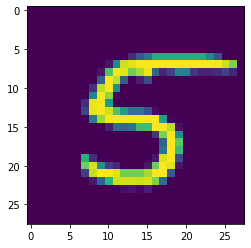

In [ ]:
idx = 2
plt.imshow(X[idx].view(28,28))

In [ ]:
torch.argmax(model(X[idx].view(-1,28*28)))

tensor(5)